In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [21]:
df=pd.read_csv(r"C:\Users\tanji\Desktop\myPW\assignments\datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


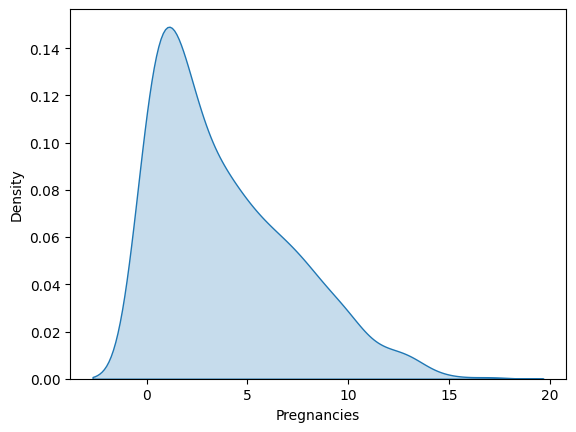

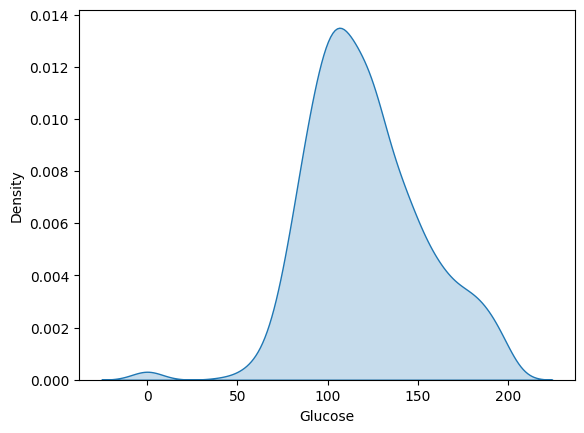

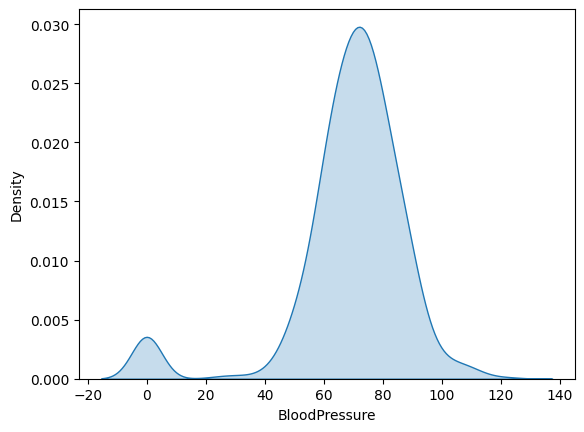

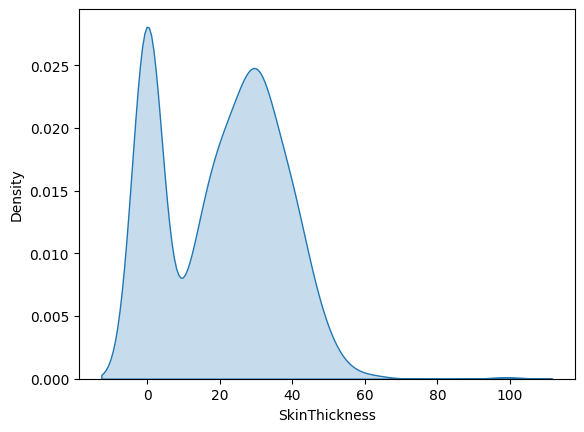

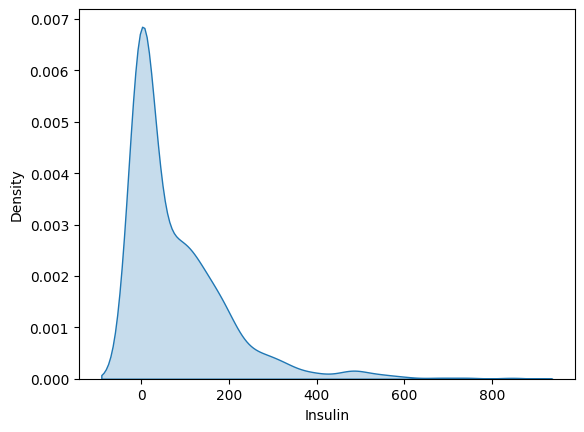

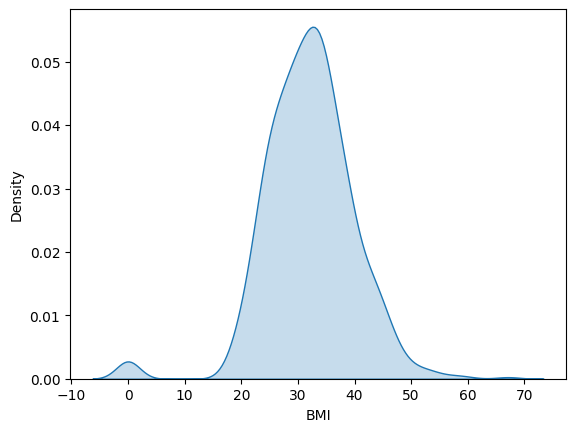

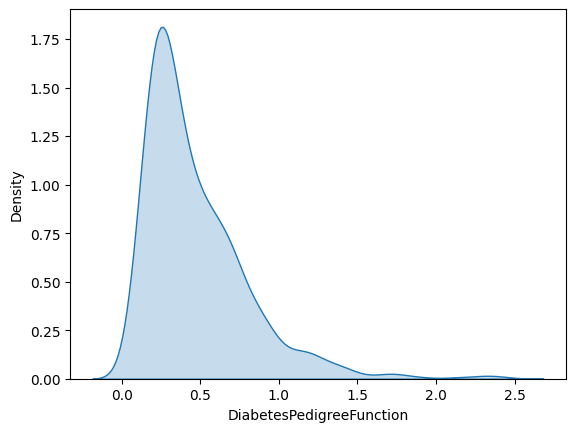

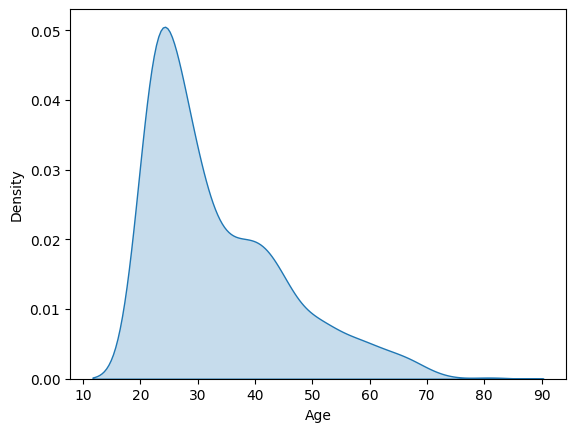

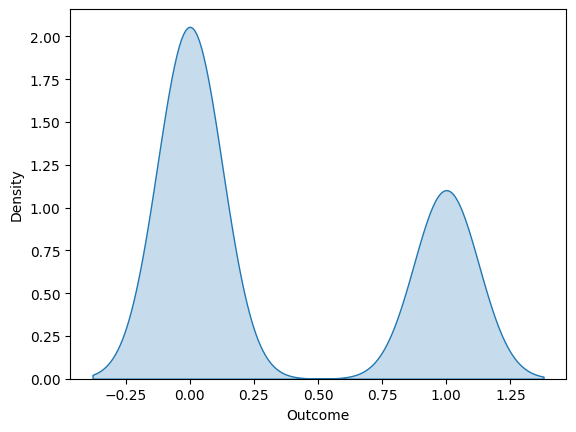

In [23]:
plt.figure
for col in df.columns:
    sns.kdeplot(data=df,x=col,shade=True)
    plt.show()

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [24]:
## null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values

- we see that 	Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI have minimum value as 0 which is not possible. So we replace it with mean values.	

In [25]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['Pregnancies'].mean())

<Axes: >

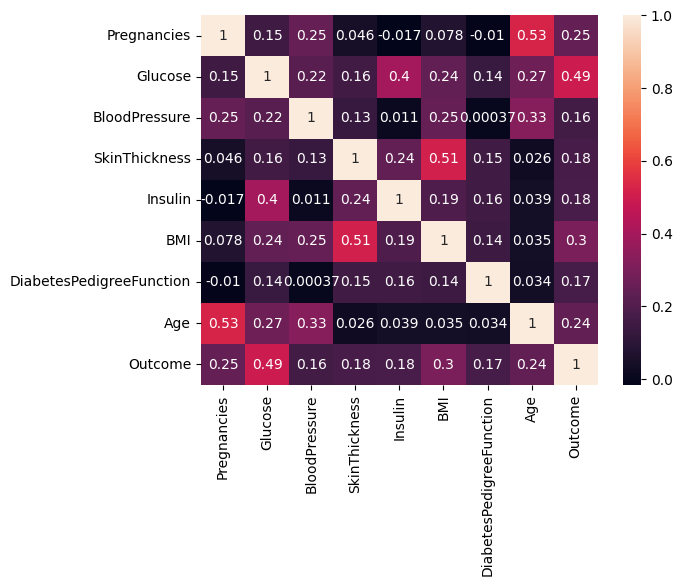

In [26]:
sns.heatmap(df.corr(), annot=True) #correlation

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [31]:
from sklearn.model_selection import train_test_split

x=df.drop('Outcome', axis=1)
y=df.Outcome

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [32]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV, KFold

parameter={
    'criterion':['gini','log_loss','entropy'],
    'splitter':['best','random'],
    'max_depth':list(range(1,10)),
    'max_features':['auto','sqrt','log2']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv=GridSearchCV(model,param_grid=parameter, cv=kf, scoring='accuracy', verbose=3)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.810 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.635 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.635 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitt

[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.617 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.557 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=0.767 total time=   0.0s
[CV 2/5] END crite

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, splitter=best;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, splitter=random;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, splitter=random;, score=0.548 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, splitter=random;, score=0.661 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, splitter=best;, score=0.661 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END crite

[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=best;, score=0.617 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, splitter=random;, score=0.678 total time=   0.0s
[CV 3/5] END criteri

[CV 1/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=best;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=best;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=best;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=best;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=random;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=random;, score=0.548 tot

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=random;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=best;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=best;, score=0.661 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=6, max_features=auto, splitter=random;, score=0.748 tot

[CV 3/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=best;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=best;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=random;, score=0.704 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=8, max_features=log2, splitter=random;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=auto, splitter=best;, score=0.810 t

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.557 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.574 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.757 total time

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.591 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.661 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.698 total time= 

[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, splitter=random;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, splitter=random;, score=0.591 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, splitter=best;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, splitter=best;, score=0.617 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, splitter=best;, score=0.730 total time= 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [58]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [59]:
y_pred=cv.predict(x_test)

## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
y_prob = cv.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

In [62]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.56
Recall: 0.71
F1 Score: 0.63


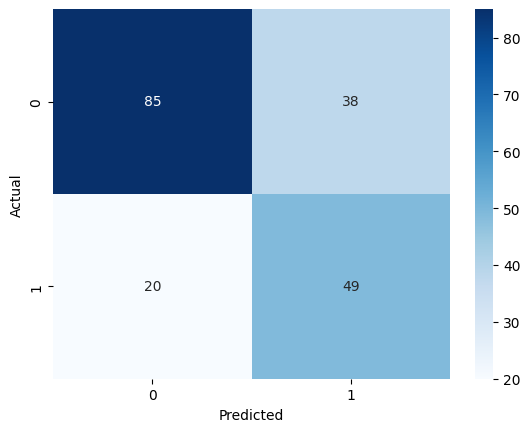

In [63]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

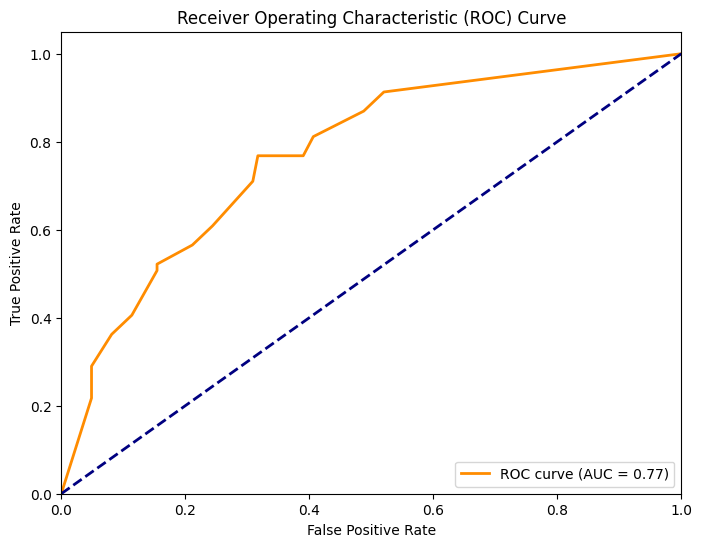

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [65]:
model=DecisionTreeClassifier(criterion= 'entropy',max_depth= 7,max_features= 'log2',splitter= 'random')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       splitter='random')

[Text(0.5064212328767124, 0.9375, 'x[1] <= 118.851\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(0.2782534246575342, 0.8125, 'x[1] <= 106.337\nentropy = 0.643\nsamples = 293\nvalue = [245, 48]'),
 Text(0.18664383561643835, 0.6875, 'x[0] <= 11.833\nentropy = 0.488\nsamples = 198\nvalue = [177, 21]'),
 Text(0.11301369863013698, 0.5625, 'x[5] <= 31.014\nentropy = 0.466\nsamples = 192\nvalue = [173, 19]'),
 Text(0.0410958904109589, 0.4375, 'x[5] <= 19.996\nentropy = 0.239\nsamples = 102\nvalue = [98, 4]'),
 Text(0.0273972602739726, 0.3125, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.0547945205479452, 0.3125, 'x[7] <= 50.684\nentropy = 0.256\nsamples = 93\nvalue = [89, 4]'),
 Text(0.0273972602739726, 0.1875, 'x[5] <= 28.434\nentropy = 0.211\nsamples = 90\nvalue = [87, 3]'),
 Text(0.0136986301369863, 0.0625, 'entropy = 0.109\nsamples = 69\nvalue = [68, 1]'),
 Text(0.0410958904109589, 0.0625, 'entropy = 0.454\nsamples = 21\nvalue = [19, 2]'),
 Text(0.0821917808219178,

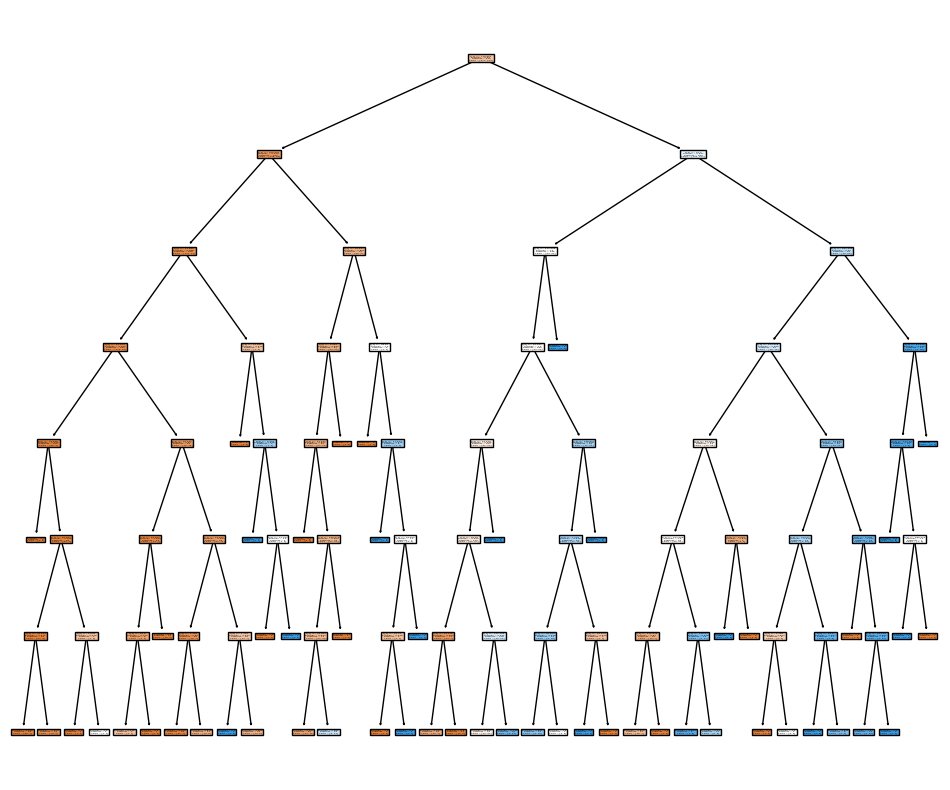

In [66]:
from sklearn import tree

plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [73]:
test_datapoint = [[2, 170, 79, 30, 80, 28, 0.467, 32]]
model.predict(test_datapoint)

array([1], dtype=int64)

- This a real world data of a diabetes person and it is classified as diabetes